# Provean

March 2nd, 2022

In [1]:
import pandas as pd
from utils import(
    save_prediction_data,
    BaselineProveanClassifier,
)

TRAIN_DATA_PATH = "../../common/train_data_with_PDB_features.csv"

In [2]:
train_data = pd.read_csv(
    TRAIN_DATA_PATH, usecols=[
        "Mutation_Effect_Label",
        "UniProt_ID",
        "Mutation",
        "Interactor_UniProt_ID",
        "Provean_score",
        "Template_cath_id_pdb",
        "Chain_id",
    ]
)

In [3]:
train_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Provean_score,Template_cath_id_pdb,Chain_id
0,0,Q9BPZ3,F118A,P11940,-5.895,1jgn,B
1,0,P01116,Y40C,P50749,-8.175,3ddc,A
2,0,Q96QK1,F534D,Q9UBQ0,-7.553,2r17,C
3,0,Q96QK1,F534D,Q9UBQ0-2,-7.553,2r17,C
4,0,O43521-3,G66A,Q07812,-4.158,3fdl,B
...,...,...,...,...,...,...,...
735,0,P84243,Q94A,Q9UER7-3,-5.785,4hga,B
736,0,Q96QK1,L589D,Q9UBQ0,-6.559,2r17,C
737,0,Q96QK1,L589D,Q9UBQ0-2,-6.559,2r17,C
738,0,P23297,F72L,P25815,-5.860,2y5i,A


In [4]:
train_data["Provean_Fixed_Prediction"] = BaselineProveanClassifier().predict(train_data[["Provean_score"]])

In [7]:
train_data

,Mutation_Effect_Label,UniProt_ID,Mutation,Interactor_UniProt_ID,Provean_score,Template_cath_id_pdb,Chain_id,Provean_Fixed_Prediction
0,0,Q9BPZ3,F118A,P11940,-5.895,1jgn,B,0
1,0,P01116,Y40C,P50749,-8.175,3ddc,A,0
2,0,Q96QK1,F534D,Q9UBQ0,-7.553,2r17,C,0
3,0,Q96QK1,F534D,Q9UBQ0-2,-7.553,2r17,C,0
4,0,O43521-3,G66A,Q07812,-4.158,3fdl,B,0
...,...,...,...,...,...,...,...,...
735,0,P84243,Q94A,Q9UER7-3,-5.785,4hga,B,0
736,0,Q96QK1,L589D,Q9UBQ0,-6.559,2r17,C,0
737,0,Q96QK1,L589D,Q9UBQ0-2,-6.559,2r17,C,0
738,0,P23297,F72L,P25815,-5.860,2y5i,A,0


0    647
1     93
Name: Provean_Fixed_Prediction, dtype: int64


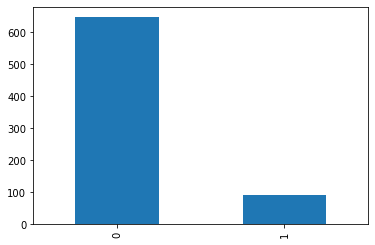

In [5]:
print(train_data["Provean_Fixed_Prediction"].value_counts())
train_data["Provean_Fixed_Prediction"].value_counts().plot(kind="bar");

In [6]:
save_prediction_data(
    benchmark_dir=".",
    prediction_file_name="Provean_Fixed_Predictions",
    prediction_data=train_data,
)

Prediction data `.\Provean_Fixed_Predictions_2022-03-02.csv`is exported.
